# Graph Size Scaling Analysis

In [11]:
import matplotlib.pyplot as plt

In [31]:
def pp_size(size):
    '''Pretty print size to the largest scale [B, KB, MB, GB].'''
    size_str = ['B', 'KB', 'MB', 'GB']
    
    scale = 0
    while size >= 1024.0:
        size /= 1024.0
        scale += 1
    
    return f'{size:0.2f} {size_str[scale]}'

## Toucan

In [1]:
# Load file.
with open('toucan_size.log', 'r') as toucan_in:
    toucan_lines = toucan_in.readlines()

In [10]:
# Compute scale and file size.
scales = list()
scale_bytes = list()

for fname, byte_size in zip(toucan_lines[::2], toucan_lines[1::2]):
    # Get scale.
    uscore = fname.index('_')
    period = fname.index('.')
    scale = int(fname[uscore + 1:period])
    scales.append(scale)
    
    # Get number of bytes.
    n_bytes = int(byte_size.strip())
    scale_bytes.append(n_bytes)

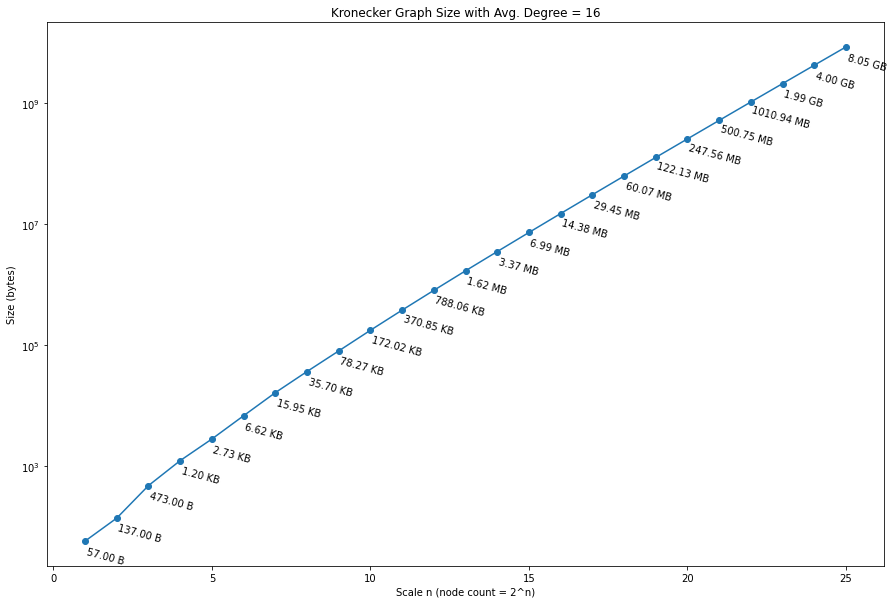

In [48]:
# Plot data.
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(scales, scale_bytes, 'o-')

# Annotate points.
for scale, n_bytes in zip(scales, scale_bytes):
    plt.annotate(pp_size(n_bytes),
                (scale, n_bytes),
                textcoords='offset points',
                xytext=(0, -15),
                ha='left',
                va='center',
                rotation=-15)

# Describe graph.
ax.set_title('Kronecker Graph Size with Avg. Degree = 16')
ax.set_xlabel('Scale n (node count = 2^n)')
ax.set_ylabel('Size (bytes)')
ax.set_yscale('log')

plt.savefig('graph_size.png', transparent=False)
# plt.show()